# Running the IBMQ and Qiskit 

## Preparing the circuit (Quantum Random Number Generator)

The access to IMB Quantum experience is done via *Qiskit* package

In [1]:
import qiskit
from qiskit.visualization import plot_histogram

The basic definition of a circuit is given by the number of qubits and the number of classical bits. Let's start with the simplest circuit having one qubit and one classical bit:

In [2]:
circuit = qiskit.QuantumCircuit(1, 1)

Having defined the basic structure of the circuit, you can define a sequence of operations performed on it. For example we might want to apply Hadamard on the qubit and then measure:

In [3]:
circuit.h(0)
circuit.measure(0,0)

At any point one can draw the circuit using the draw object. Default setting is text output:

In [4]:
circuit.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

However, one can obtain a more comprehensible output using the Matplotlib:

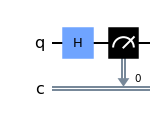

In [5]:
circuit.draw(output="mpl")

## Simulating the circuit 

To run the circuit, define first the backend for your circuit. You can use start by using a built-in (local) simulator. A standard one is provided in Aer framework called *QASM*. A *QASM* simulator is available also as an IBM cloud service. Finally, you can use also one of the available quantum computers. For now, let us start with the built-in simulator.

In [6]:
simulator = qiskit.Aer.get_backend('qasm_simulator')

Then you can run the job using the <code>execute</code> command.

In [7]:
job = qiskit.execute(circuit, simulator, shots=1024)

In [8]:
counts = job.result().get_counts()
print(counts)

{'0': 530, '1': 494}


The <code>result()</code> object is not just results, it contains an extensive information about performed job

In [9]:
job.result()

Result(backend_name='0.7.0', backend_version='0.7.0', qobj_id='3531e27d-bcc0-4fb2-900b-fc6a79851f08', job_id='94bf5842-051b-4904-9f71-457590fb51a5', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=MeasLevel.CLASSIFIED, data=ExperimentResultData(counts={'0x0': 530, '0x1': 494}), header=QobjExperimentHeader(clbit_labels=[['c', 0]], creg_sizes=[['c', 1]], global_phase=0.0, memory_slots=1, n_qubits=1, name='circuit10', qreg_sizes=[['q', 1]], qubit_labels=[['q', 0]]), status=DONE, seed_simulator=3363309609, time_taken=0.0040912, metadata={'fusion': {'enabled': False}, 'measure_sampling': True, 'method': 'stabilizer', 'parallel_shots': 1, 'parallel_state_update': 8})], date=2021-10-07T10:12:44.997726, status=COMPLETED, status=QobjHeader(backend_name='qasm_simulator', backend_version='0.7.0'), metadata={'max_memory_mb': 8097, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0042318}, time_taken=0.004986286163330078)

One can use also visualize these results

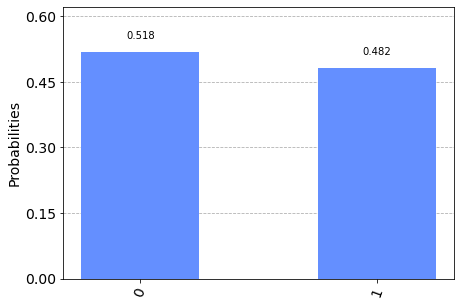

In [10]:
plot_histogram(counts)

in the ideal case, the quantum system provides a physical way of obtaining randomness. Hence, we have created a quantum RNG.

## The Quantum Experience

To use IBM quantum computer, import IBMQ object from Qiskit package. This object manages account credentials.

In [12]:
from qiskit import IBMQ

If you are first-time user, you need to get an API token. Follow the instructions on <a href="https://qiskit.org/documentation/install.html#access-ibm-q-systems">this page</a> to create your own token. After you obtain it, run the following code, where you replace <code>MY_API_TOKEN</code> with the token you obtained.

In [13]:
IBMQ.save_account('51bab9542993d3903eab4d901a0d1a5824e2209718d45b125d2d814031ce83323cb102a1c528d2a92e09dd83076e5bb50f3a0eedc40f5eeb2255bd72813471b9')

configrc.store_credentials:WARNING:2021-10-07 10:16:15,684: Credentials already present. Set overwrite=True to overwrite.


If you have already used the account and the token is stored on your computer, you can load it using

In [14]:
IBMQ.load_account()

C:\ProgramData\Anaconda3\envs\PQP\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

You can chec the active account using code

In [15]:
IBMQ.active_account()

{'token': '51bab9542993d3903eab4d901a0d1a5824e2209718d45b125d2d814031ce83323cb102a1c528d2a92e09dd83076e5bb50f3a0eedc40f5eeb2255bd72813471b9',
 'url': 'https://auth.quantum-computing.ibm.com/api'}

Now, to run the job, first select the device that will be used as a backend instead of simulator. First, let us look at available devices.

In [16]:
IBMQ.get_provider().backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

These are all the backends you can use. The first one is the *QASM* cloud simulator, and the rest are available quantum computers. Some are more busy than others and we can use the least busy one.

In [ ]:
device = qiskit.providers.ibmq.least_busy(IBMQ.get_provider().backends(operational=True, simulator=False))

Or you can choose your preferred computer by name.

In [17]:
device = IBMQ.get_provider().get_backend("ibmq_santiago")

Now you can run the job in the same way as when we used the simulator

In [18]:
job = qiskit.execute(circuit, device, shots=1024)

You can monitor the progress of your job, as it can take several minutes to go through the queue and run

In [19]:
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


Now, you can look at the results

In [ ]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

## Quantum computer v. QASM simulator 

To see the basic difference between the simulator and the quantum computer, it is enough to just prepare an "empty" circuit, in which we just measure the initialized state.

In [ ]:
circuit = qiskit.QuantumCircuit(1, 1)
circuit.measure(0, 0)
circuit.draw(output="mpl")

Classical QASM simulation will use the predefined <code>simulator</code> backend.

In [ ]:
cjob = qiskit.execute(circuit, simulator, shots=1024)
ccounts = cjob.result().get_counts()

For quantum computation we will use already defined quantum computer in <code>device</code>.

In [ ]:
qjob = qiskit.execute(circuit, device, shots=1024)
job_monitor(qjob)

In [ ]:
qcounts = qjob.result().get_counts()

Let's plot the results of both runs.

In [ ]:
plot_histogram([ccounts, qcounts], legend=["QASM", "QC"])

We see that in simulation the initialization to vector $|0\rangle$ is perfect - out of all 1024 runs all ended with measurement outcome 0. Quantum computers, however, at present have a high faoult rate and so even in this simplest case we can obtain an error - measurement of vector $|0\rangle$ can give outcome 1.